# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the course!

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Grab data
# Faster alternative
df = pd.read_csv('data/walmart_stock.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


Create a date index from the date column

In [7]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


## resample()

A common operation with time series data is resamplling based on the time series index. Let see how to use the resample() method.

#### All possible time series offest strings
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [10]:
# Our index
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [14]:
# quarter max
df.resample(rule='Q').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,62.400002,62.630001,61.910000,62.480000,28630200,54.494442
2012-06-30,68.940002,69.720001,68.559998,69.720001,38007300,61.631517
2012-09-30,74.959999,75.239998,74.449997,75.139999,17813200,66.781948
2012-12-31,77.599998,77.599998,76.690002,77.150002,23401900,68.568371
2013-03-31,74.930000,75.110001,74.430000,74.849998,25683700,67.324929
2013-06-30,79.230003,79.959999,78.900002,79.860001,14564500,72.262093
2013-09-30,78.680000,79.000000,78.430000,78.769997,14972300,71.275793
2013-12-31,81.209999,81.370003,80.820000,81.209999,10633700,73.929868
2014-03-31,78.860001,79.470001,78.519997,78.910004,17160200,72.254228


### Custom Resampling

You could technically also create your own custom resampling function:

In [12]:
def last_day(entry):
    """
    Returns the last instance of the period, regardless of samplling rate.
    """
    return entry[-1]

In [13]:
df.resample(rule='A').apply(last_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.489998,68.300003,67.370003,68.230003,7012500,60.977077
2013-12-31,78.660004,78.870003,78.349998,78.690002,3859100,72.052783
2014-12-31,87.080002,87.440002,85.860001,85.879997,4151400,80.606085
2015-12-31,61.330002,61.720001,61.169998,61.299999,6555100,59.135363
2016-12-31,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


Text(0.5, 1.0, 'Yearly Mean Close Price for Walmart')

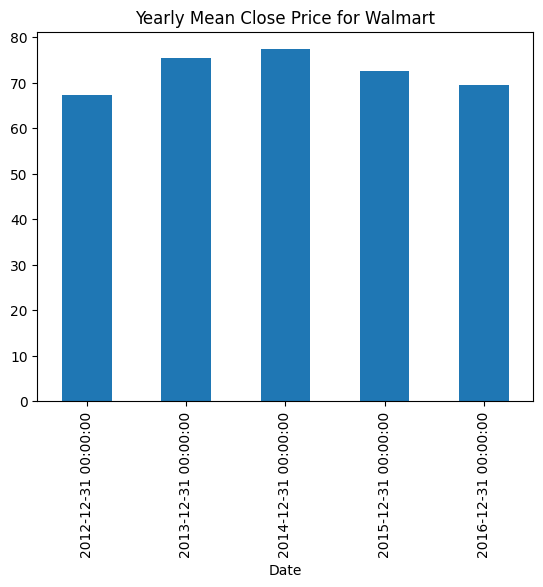

In [14]:
df['Close'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean Close Price for Walmart')

Text(0.5, 1.0, 'Monthly Max Opening Price for Walmart')

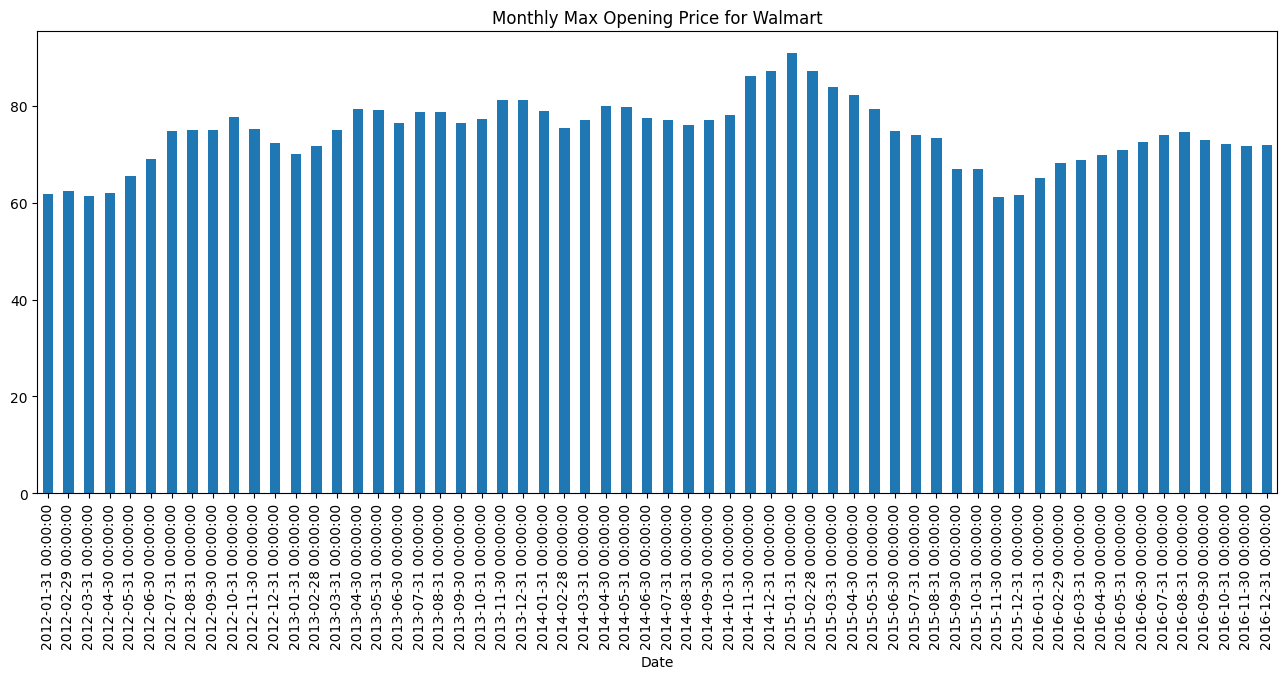

In [15]:
df['Open'].resample('M').max().plot(kind='bar',figsize=(16,6))
plt.title('Monthly Max Opening Price for Walmart')